In [1]:
import numpy as np
import pandas as pd


In [10]:

df = pd.read_csv("data/TAS1F06180329 (2018-10-24)-IMU.csv")
df.columns = df.columns.str.strip()
df = df[0:50000]
df.shape

(50000, 11)

In [11]:
df.head()


,Timestamp,Accelerometer X,Accelerometer Y,Accelerometer Z,Temperature,Gyroscope X,Gyroscope Y,Gyroscope Z,Magnetometer X,Magnetometer Y,Magnetometer Z
0,2018-10-24T11:20:00.0000000,0.046875,-0.008301,1.015625,31.689790,-1.403809,1.403809,-0.549316,-11.132812,7.03125,24.316405
1,2018-10-24T11:20:00.0100000,0.049316,-0.003906,1.016602,31.698775,-1.647949,1.342774,-0.549316,-11.132812,7.03125,24.316405
2,2018-10-24T11:20:00.0200000,0.045898,-0.010742,1.010254,31.695780,-2.258301,1.159668,-0.549316,-11.132812,7.03125,24.316405
3,2018-10-24T11:20:00.0300000,0.044922,-0.010254,1.014160,31.698775,-2.258301,1.098633,-0.549316,-11.132812,7.03125,24.316405
4,2018-10-24T11:20:00.0400000,0.050781,-0.011719,1.008301,31.677809,-2.380371,1.037598,-0.549316,-11.132812,7.03125,24.316405


In [12]:
# CLEANING DATA
# check null
df.isnull().sum()
# => ko co gia tri null
df.isna().sum()
# => ko co gia tri NaN


Timestamp          0
Accelerometer X    0
Accelerometer Y    0
Accelerometer Z    0
Temperature        0
Gyroscope X        0
Gyroscope Y        0
Gyroscope Z        0
Magnetometer X     0
Magnetometer Y     0
Magnetometer Z     0
dtype: int64

Text(0, 0.5, 'Gyroscope X')

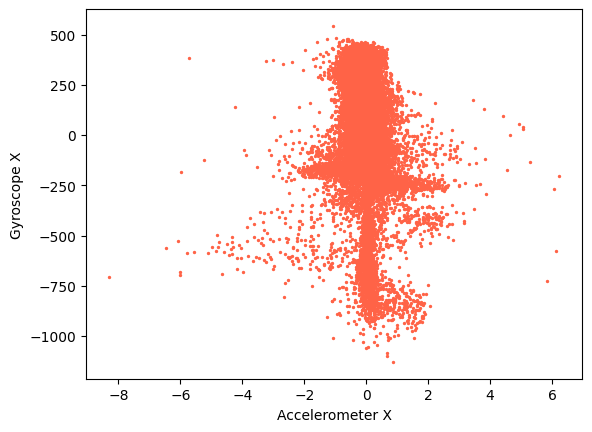

In [13]:
# Plotting the Scatter Plot
import matplotlib.pyplot as plt
plt.scatter(df['Accelerometer X'],df['Gyroscope X'], c='tomato', s=2)
plt.xlabel("Accelerometer X")
plt.ylabel("Gyroscope X")

[[-5.05423135e-02  3.40011327e+01]
 [ 1.37083596e-01 -5.27036478e+02]]


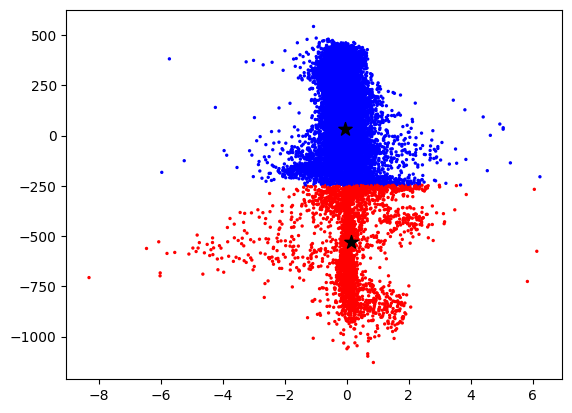

In [14]:
# Clustering Using K-Means
#---using sci-kit-learn---
from sklearn.cluster import KMeans
k = 2
X = np.array(list(zip(df['Accelerometer X'],df['Gyroscope X'])))
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]
plt.scatter(df['Accelerometer X'],df['Gyroscope X'], c=colors, s=2)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
print(centroids)

In [ ]:
# Finding the Optimal Size Classes
from sklearn import metrics
silhouette_avgs = []
min_k = 2
#---try k from 2 to maximum number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(X)
    score = metrics.silhouette_score(X, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)
#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", Optimal_K)

Silhouette Coefficients for k = 2 is 0.7862296145498047
Silhouette Coefficients for k = 3 is 0.8229313607082956
